# 75.06/95.58 Organización de Datos
# Segundo Cuatrimestre de 2018
# Trabajo Práctico 1: Enunciado

In [357]:
import locale
import pandas as pd
import matplotlib   #requerido para color map
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


#Tree Map
#import squarify

%matplotlib inline
plt.style.use('default')
sns.set(style="whitegrid")

## Cargo los datos

Especifico que ciertas columnas se carguen como categorias por temas de rendimiento

In [358]:
# ---------------------------------------------------------------------------------
# Corregir el PATH al archivo
# ---------------------------------------------------------------------------------

#Ultraseven
trocaFilePath = 'C:\\Users\MarianoAdm\\OneDrive\\_75-06 Organizacion de Datos\\Data\\TP1\\events.csv'

#sqltZeus
#trocaFilePath = 'C:\\Users\Mariano\\OneDrive\\_75-06 Organizacion de Datos\\Data\\TP1\\events.csv'

troca = pd.read_csv(trocaFilePath,
                    parse_dates=['timestamp'],
                    dtype={'event':'category', 'city':'category', 'region':'category', 'country':'category', 
                           'condition':'category', 'storage':'category', 'color' : 'category','device_type':'category',
                           'campaign_source':'category', 'search_engine':'category', 'channel':'category', 
                           'new_vs_returning':'category', 'screen_resolution':'category',
                           'url':'category', 'sku':'category', 'staticpage':'category', 
                           'operating_system_version':'category','browser_version':'category'},
                    low_memory=False,
                    infer_datetime_format=True)



In [44]:
#troca.head(3)
#troca.dtypes
#troca.event.size

1011288

In [5]:
# ---------------------------------------------------------------------------------
# Analisis de valores distintos para determinar valores categoricos
# ---------------------------------------------------------------------------------

#troca.condition.value_counts()
#troca.storage.value_counts()
#troca.color.value_counts()
#troca.device_type.value_counts()
#troca.screen_resolution.value_counts()
#troca.operating_system_version.value_counts()
#troca.browser_version.value_counts()
#troca.campaign_source.value_counts()
#troca.search_engine.value_counts()
#troca.search_term.value_counts()
#troca.channel.value_counts()
#troca.new_vs_returning.value_counts()
#troca.url.value_counts()
#troca.sku.value_counts()
#troca.search_term.value_counts()
#troca.staticpage.value_counts()
#troca.model.value_counts()

troca.event.value_counts()


viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

## Preparacion inicial del dataset

El objetivo de esta etapa es agregar las columnas que poreciso para hacer más facil el proceso de análisis.


### Columnas "marca" y "modelo"

In [359]:
# ---------------------------------------------------------------------------------
#  Determina Marca y modelo
# ---------------------------------------------------------------------------------
def getMarca(marcaModelo):
    if (marcaModelo == marcaModelo):
        x=marcaModelo.split()
        return ''.join(x[0:1])
    return marcaModelo

def getModelo(marcaModelo):
    if (marcaModelo == marcaModelo):
        x=marcaModelo.split()
        return ' '.join(x[1:])
    return marcaModelo



# agrega columnas de marca y modelo
troca['marca'] = troca.model.apply(lambda x: getMarca(str(x))).astype('category')
troca['modelo'] = troca.model.apply(lambda x: getModelo(str(x))).astype('category') 

# Elimina la columna model (solo hacerlo al finalde las pruebas por las dudas)
troca.drop(['model'], axis=1 , inplace=True)



# reviso los resultados
#troca[['model','marca','modelo']].head(10)
#with pd.option_context("display.max_rows", 1000):
#    display(troca.groupby(['model','marca','modelo']).size())


### Agrega columnas con propiedades del  "timestamp"

In [360]:
# ---------------------------------------------------------------------------------
# Completa el dataset con los las propiedades del timestamp
# ---------------------------------------------------------------------------------
troca['dia'] = troca.timestamp.dt.day
troca['dia_anio'] = troca.timestamp.dt.dayofyear
troca['mes'] = troca.timestamp.dt.month
# TODO Ajustar 0 = domingo en lugar de lunes si hay tiempo
troca['dia_semana'] = troca.timestamp.dt.dayofweek 
troca['dia_nombre'] = troca.timestamp.dt.day_name('es_ES.utf8')
troca['hora'] = troca.timestamp.dt.hour
troca['semana'] = troca.timestamp.dt.week

# Por un BUG no me carga el Locale y hay que ejecutarlo 2 veces ! ! ! !


In [361]:


reg_productos = troca[['sku','marca','modelo']].drop_duplicates(['sku','marca','modelo']).dropna()

reg_productos.head(3)

,sku,marca,modelo
2,2694.0,iPhone,5s
4,15338.0,Samsung,Galaxy S8
13,12661.0,Motorola,Moto Z Play


In [362]:
# ---------------------------------------------------------------------------------
# Registros del tipo 'visited site'
# ---------------------------------------------------------------------------------
# Estos registros sirven para analizar como llegan al sitio pero no sirven para saber
# nada del sitio (no hay url ni datos de compras)
#
reg_visited_site = troca[troca.event == 'visited site'].dropna(axis=1, how='all')
#display(reg_visited_site.head(3))
#reg_visited_site.event.size

In [363]:
reg_viewed_product = troca[troca.event == 'viewed product'].dropna(axis=1, how='all')
display(reg_viewed_product.head(1))




,timestamp,event,person,sku,condition,storage,color,marca,modelo,dia,dia_anio,mes,dia_semana,dia_nombre,hora,semana
2,2018-05-31 23:38:09,viewed product,0004b0a2,2694.0,Bom,32GB,Cinza espacial,iPhone,5s,31,151,5,3,Jueves,23,22


In [364]:
reg_conversion = troca[troca.event == 'conversion'].dropna(axis=1, how='all')
display(reg_conversion.head(3))



,timestamp,event,person,sku,condition,storage,color,marca,modelo,dia,dia_anio,mes,dia_semana,dia_nombre,hora,semana
220,2018-03-20 17:46:12,conversion,00204059,3084.0,Muito Bom,32GB,Couro Vintage,Motorola,Moto X2,20,79,3,1,Martes,17,12
2282,2018-04-26 22:28:53,conversion,00c13dee,6650.0,Muito Bom,4GB,Branco,Samsung,Galaxy Core Plus Duos TV,26,116,4,3,Jueves,22,17
2547,2018-06-10 14:37:50,conversion,00fdbb4b,3348.0,Muito Bom,32GB,Branco,Samsung,Galaxy S6 Flat,10,161,6,6,Domingo,14,23


In [365]:
reg_checkout = troca[troca.event == 'checkout'].dropna(axis=1, how='all')
display(reg_checkout.head(3))


,timestamp,event,person,sku,condition,storage,color,marca,modelo,dia,dia_anio,mes,dia_semana,dia_nombre,hora,semana
3,2018-05-31 23:38:40,checkout,0004b0a2,2694.0,Bom,32GB,Cinza espacial,iPhone,5s,31,151,5,3,Jueves,23,22
7,2018-05-29 13:29:35,checkout,0006a21a,15338.0,Bom,64GB,Dourado,Samsung,Galaxy S8,29,149,5,1,Martes,13,22
44,2018-05-24 11:34:32,checkout,000a54b2,12660.0,Bom,32GB,Preto,Motorola,Moto Z Play,24,144,5,3,Jueves,11,21


In [366]:
reg_brand_listing = troca[troca.event == 'brand listing'].dropna(axis=1, how='all')
display(reg_brand_listing.head(3))

reg_ad_campaign_hit = troca[troca.event == 'ad campaign hit'].dropna(axis=1, how='all')
display(reg_ad_campaign_hit.head(3))

reg_generic_listing = troca[troca.event == 'generic listing'].dropna(axis=1, how='all')
display(reg_generic_listing.head(3))

reg_searched_products = troca[troca.event == 'searched products'].dropna(axis=1, how='all')
display(reg_searched_products.head(3))

reg_search_engine_hit = troca[troca.event == 'search engine hit'].dropna(axis=1, how='all')
display(reg_search_engine_hit.head(3))






,timestamp,event,person,skus,marca,modelo,dia,dia_anio,mes,dia_semana,dia_nombre,hora,semana
12,2018-04-09 20:12:53,brand listing,000a54b2,"5075,12536,12520,12661,12506,12549,10449,9175,...",nan,,9,99,4,0,Lunes,20,15
14,2018-04-09 20:13:20,brand listing,000a54b2,"5075,12536,12520,12661,12506,12549,10449,9175,...",nan,,9,99,4,0,Lunes,20,15
20,2018-05-24 11:26:53,brand listing,000a54b2,"8499,8485,8471,8443",nan,,24,144,5,3,Jueves,11,21


,timestamp,event,person,url,campaign_source,marca,modelo,dia,dia_anio,mes,dia_semana,dia_nombre,hora,semana
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,criteo,nan,,31,151,5,3,Jueves,23,22
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,criteo,nan,,29,149,5,1,Martes,13,22
11,2018-04-09 20:12:31,ad campaign hit,000a54b2,/,google,nan,,9,99,4,0,Lunes,20,15


,timestamp,event,person,skus,marca,modelo,dia,dia_anio,mes,dia_semana,dia_nombre,hora,semana
8,2018-04-09 20:12:31,generic listing,000a54b2,"10310,13333,13347,9902,9944,12774,12801,12744,...",nan,,9,99,4,0,Lunes,20,15
18,2018-05-24 11:21:08,generic listing,000a54b2,"6649,7237,2820,2750,6707,6720,7224,12619,12605...",nan,,24,144,5,3,Jueves,11,21
19,2018-05-24 11:26:34,generic listing,000a54b2,"6649,7237,2820,2750,6707,6720,7224,12619,12605...",nan,,24,144,5,3,Jueves,11,21


,timestamp,event,person,skus,search_term,marca,modelo,dia,dia_anio,mes,dia_semana,dia_nombre,hora,semana
157,2018-02-06 02:29:49,searched products,00204059,"2692,6819,823,2779,13864,2784,8135,6805,2773,2...",moto g 4,nan,,6,37,2,1,Martes,2,6
159,2018-02-06 02:32:41,searched products,00204059,"2692,6819,823,2779,13864,2784,8135,6805,2773,2...",moto g 4,nan,,6,37,2,1,Martes,2,6
238,2018-05-21 19:56:33,searched products,0024ad28,"3371,6357,6371,10896,2718,2777,6001,2694,3191,...",comprar celulares usados bom e barato em poa rs,nan,,21,141,5,0,Lunes,19,21


,timestamp,event,person,search_engine,marca,modelo,dia,dia_anio,mes,dia_semana,dia_nombre,hora,semana
10,2018-04-09 20:12:31,search engine hit,000a54b2,Google,nan,,9,99,4,0,Lunes,20,15
17,2018-05-24 11:21:07,search engine hit,000a54b2,Google,nan,,24,144,5,3,Jueves,11,21
47,2018-04-06 05:12:05,search engine hit,00184bf9,Google,nan,,6,96,4,4,Viernes,5,14


In [367]:
# ---------------------------------------------------------------------------------
# Analisis de eventos relacionado con una persona que hizo una conversion
# ---------------------------------------------------------------------------------

#with pd.option_context("display.max_rows", 1000):
#    display(troca[troca.person == 'e3215d53'].sort_values(by=['timestamp']))
#    display(troca[troca.person == '52a4edd3'].sort_values(by=['timestamp']))
    #display(troca[troca.person == '00204059'].sort_values(by=['timestamp']))
    #display(troca[troca.person == '00c13dee'].sort_values(by=['timestamp']))
    #display(troca[troca.person == '00fdbb4b'].sort_values(by=['timestamp']))
    


# Como es muy dificil ver los eventos en el navegador exporto los resultados en un CSV 
# para verlos y navegarlos más facilmente en un EXCEL     





## Analisis temporal de ingresos al sitio

### Ingresos por dia de la semana y hora

In [368]:
pvt_visited_site_hora_dia_semana = reg_visited_site.pivot_table(index='hora',columns='dia_semana', values='event', aggfunc='count')
#display(pvt_visited_site_hora_dia_semana)

[Text(0.5,0,'0'),
 Text(1.5,0,'1'),
 Text(2.5,0,'2'),
 Text(3.5,0,'3'),
 Text(4.5,0,'4'),
 Text(5.5,0,'5'),
 Text(6.5,0,'6')]

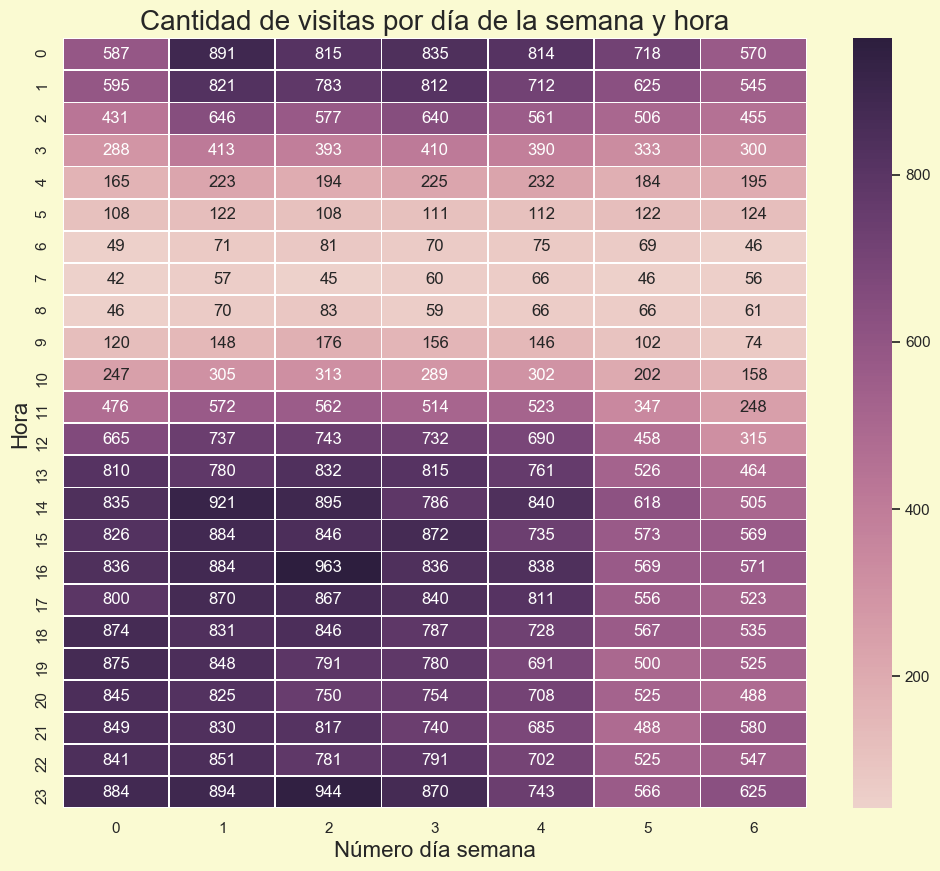

In [369]:
fig = plt.figure(figsize=(12, 10),facecolor='lightgoldenrodyellow')
#plt.subplots(figsize=(8,8))
cmap1 = sns.cubehelix_palette(8, as_cmap=True)    
plt_visited_site_hora_dia_semana = sns.heatmap(pvt_visited_site_hora_dia_semana,linewidths=.5,fmt="d",annot=True,cmap=cmap1)
plt_visited_site_hora_dia_semana.set_title("Cantidad de visitas por día de la semana y hora",fontsize=20)
plt_visited_site_hora_dia_semana.set_xlabel("Número día semana",fontsize=16)
plt_visited_site_hora_dia_semana.set_ylabel("Hora",fontsize=16)
plt_visited_site_hora_dia_semana.set_xticklabels(plt_visited_site_hora_dia_semana.get_xticklabels(),rotation=0)


#Otras paletas probadas
# sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)
# sns.cubehelix_palette(light=1, as_cmap=True)
# sns.dark_palette("muted purple", input="xkcd", as_cmap=True)



## Ingresos por dia del mes


In [370]:
pvt_visited_site_dia_mes = reg_visited_site.pivot_table(index='dia',columns='mes', values='event', aggfunc='count').fillna(0).astype(int)

[Text(0.5,0,'1'),
 Text(1.5,0,'2'),
 Text(2.5,0,'3'),
 Text(3.5,0,'4'),
 Text(4.5,0,'5'),
 Text(5.5,0,'6')]

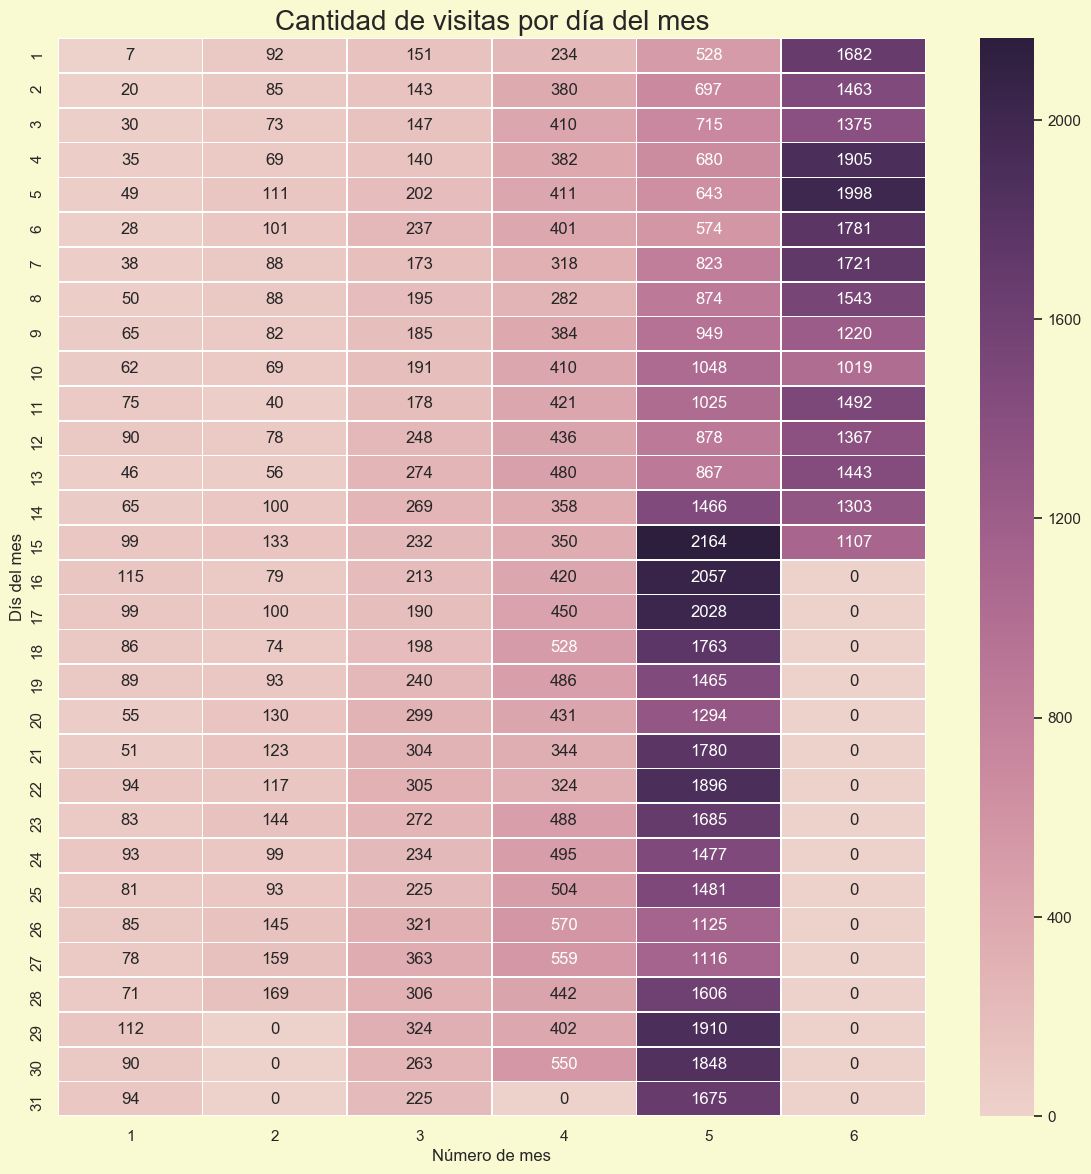

In [371]:
fig = plt.figure(figsize=(14, 14),facecolor='lightgoldenrodyellow')
#plt.subplots(figsize=(8,8))
cmap1 = sns.cubehelix_palette(8, as_cmap=True)

plt_pvt_visited_site_dia_mes = sns.heatmap(pvt_visited_site_dia_mes,linewidths=.5, fmt="d" ,annot=True,cmap=cmap1)
plt_pvt_visited_site_dia_mes.set_title("Cantidad de visitas por día del mes",fontsize=20)
plt_pvt_visited_site_dia_mes.set_xlabel("Número de mes",fontsize=12)
plt_pvt_visited_site_dia_mes.set_ylabel("Dís del mes",fontsize=12)
plt_pvt_visited_site_dia_mes.set_xticklabels(plt_pvt_visited_site_dia_mes.get_xticklabels(),rotation=0)


## Análisis temporal de conversiones y checkuots


In [372]:

pvt_conversion_hora_dia_semana = reg_conversion.pivot_table(index='hora',columns='dia_semana', values='event', aggfunc='count').fillna(0).astype(int)
# display(pvt_conversion_hora_dia_semana)

[Text(0.5,0,'0'),
 Text(1.5,0,'1'),
 Text(2.5,0,'2'),
 Text(3.5,0,'3'),
 Text(4.5,0,'4'),
 Text(5.5,0,'5'),
 Text(6.5,0,'6')]

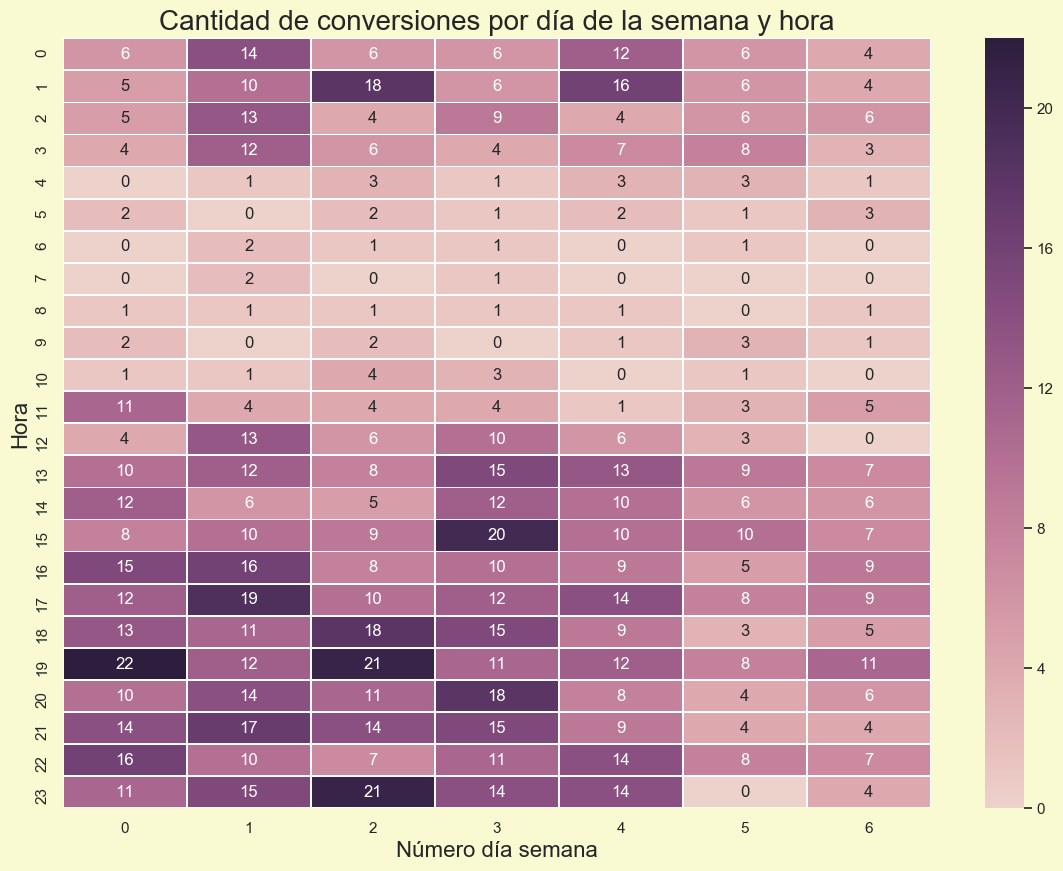

In [373]:
fig = plt.figure(figsize=(14, 10),facecolor='lightgoldenrodyellow')
#plt.subplots(figsize=(8,8))
cmap1 = sns.cubehelix_palette(8, as_cmap=True)    
plt_conversion_hora_dia_semana = sns.heatmap(pvt_conversion_hora_dia_semana,linewidths=.5,fmt="d",annot=True,cmap=cmap1)
plt_conversion_hora_dia_semana.set_title("Cantidad de conversiones por día de la semana y hora",fontsize=20)
plt_conversion_hora_dia_semana.set_xlabel("Número día semana",fontsize=16)
plt_conversion_hora_dia_semana.set_ylabel("Hora",fontsize=16)
plt_conversion_hora_dia_semana.set_xticklabels(plt_conversion_hora_dia_semana.get_xticklabels(),rotation=0)


Text(0,0.5,'Cantidad')

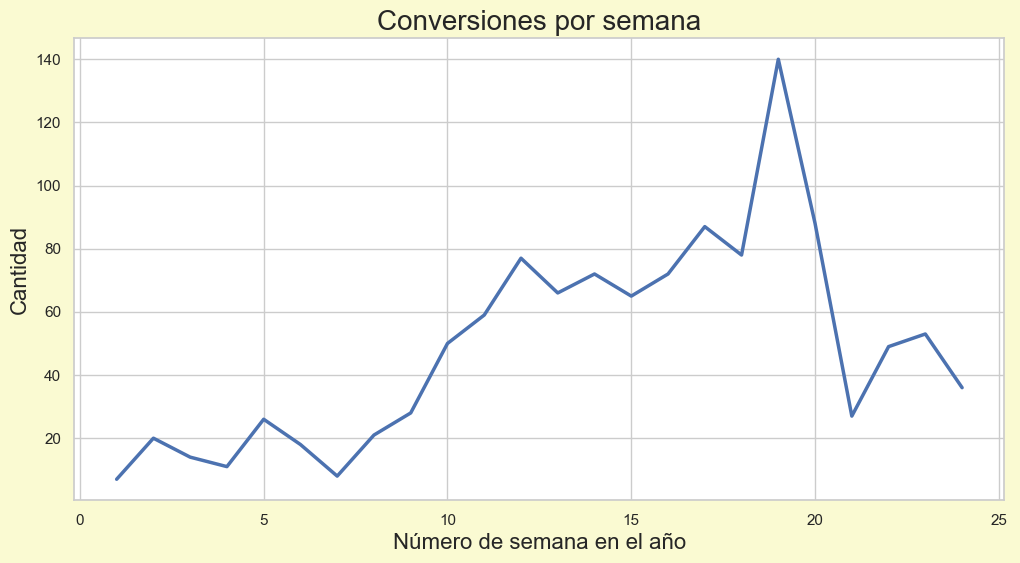

In [374]:
fig = plt.figure(figsize=(12, 6),facecolor='lightgoldenrodyellow')
#plt.subplots(figsize=(6,6))
conversiones_serie = reg_conversion.groupby('semana').size() 
#.to_frame(name='cantidad').reset_index()
#conversiones_serie.set_index('dia_anio')
plt_conversion_semana = sns.lineplot(data=conversiones_serie, linewidth=2.5)
plt_conversion_semana.set_title("Conversiones por semana",fontsize=20)
plt_conversion_semana.set_xlabel("Número de semana en el año",fontsize=16)
plt_conversion_semana.set_ylabel("Cantidad",fontsize=16)

#.sort_values(ascending=False).to_frame(name='cantidad').reset_index()

In [375]:

per_conversion = reg_conversion.person.value_counts().to_frame()
per_checkout = reg_checkout.person.value_counts().to_frame()
df1 = per_conversion.merge(per_checkout,how='inner', left_index=True, right_index=True ).head(10)
df1.columns = ['cant_conversion','cant_checkuot']
df1.head(10)




,cant_conversion,cant_checkuot
252adec6,15,4
4200bdee,12,11
a0d4baef,11,20
ba325a6b,10,2
d12fbe38,8,2
f646efa2,8,8
a96e304b,8,13
19b38ba2,7,23
a7713c81,7,5
a925072a,7,9


In [376]:

#conversiones = troca.loc[troca.event == 'conversion', 'person'].drop_duplicates()
#eventos_de_personas_con_conversiones = troca.loc[troca.person.isin(conversiones), :]


In [377]:
#troca[troca.person == '52a4edd3'].sort_values(by=['timestamp']).to_csv('Person_52a4edd3.csv')


In [378]:
pvt_ingreso = reg_visited_site.pivot_table(index='channel',columns='new_vs_returning', values='event', aggfunc='count').fillna(0).astype(int)

[Text(0,0.5,'Direct'),
 Text(0,1.5,'Email'),
 Text(0,2.5,'Organic'),
 Text(0,3.5,'Paid'),
 Text(0,4.5,'Referral'),
 Text(0,5.5,'Social'),
 Text(0,6.5,'Unknown')]

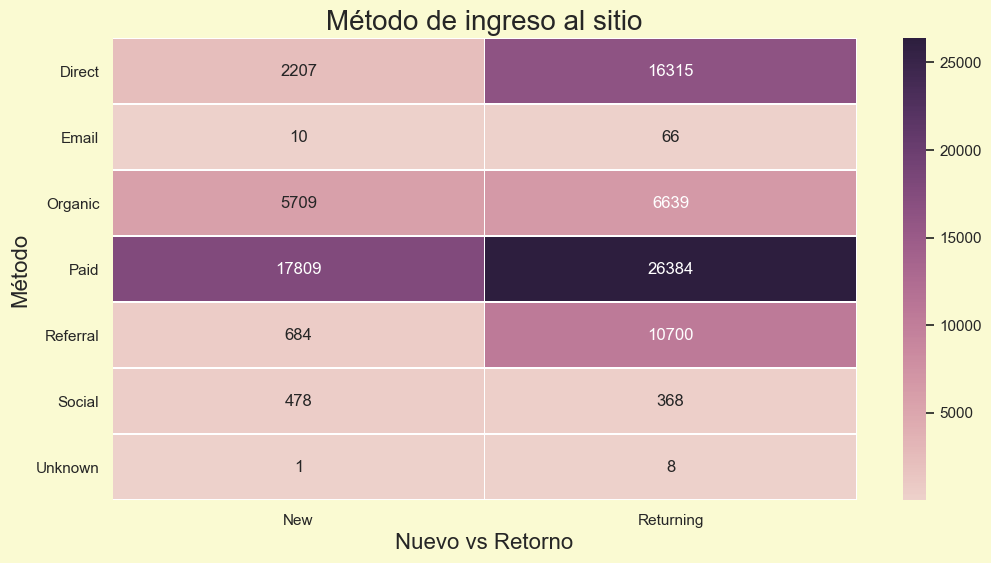

In [379]:
fig = plt.figure(figsize=(12, 6),facecolor='lightgoldenrodyellow')
cmap1 = sns.cubehelix_palette(8, as_cmap=True)    
plt_ingreso = sns.heatmap(pvt_ingreso,linewidths=.5,fmt="d",annot=True,cmap=cmap1)
plt_ingreso.set_title("Método de ingreso al sitio",fontsize=20)
plt_ingreso.set_xlabel("Nuevo vs Retorno",fontsize=16 )
plt_ingreso.set_ylabel("Método",fontsize=16)
plt_ingreso.set_yticklabels(plt_ingreso.get_yticklabels(),rotation=0)


[Text(0,0.5,'Direct'),
 Text(0,1.5,'Email'),
 Text(0,2.5,'Organic'),
 Text(0,3.5,'Paid'),
 Text(0,4.5,'Referral'),
 Text(0,5.5,'Social'),
 Text(0,6.5,'Unknown')]

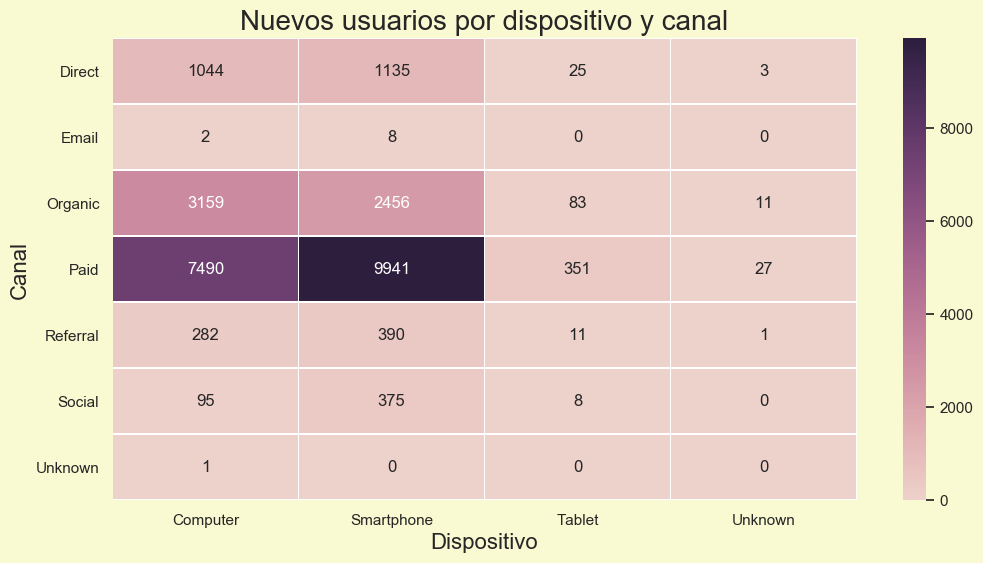

In [380]:
pvt_new_dispositivo = reg_visited_site[reg_visited_site.new_vs_returning == 'New'].pivot_table(index=['channel'],columns=['device_type'], values='event', aggfunc='count').fillna(0).astype(int)

fig = plt.figure(figsize=(12, 6),facecolor='lightgoldenrodyellow')
cmap1 = sns.cubehelix_palette(8, as_cmap=True)    
plt_new_dispositivo = sns.heatmap(pvt_new_dispositivo,linewidths=.5,fmt="d",annot=True,cmap=cmap1)
plt_new_dispositivo.set_title("Nuevos usuarios por dispositivo y canal",fontsize=20)
plt_new_dispositivo.set_xlabel("Dispositivo",fontsize=16 )
plt_new_dispositivo.set_ylabel("Canal",fontsize=16)
plt_new_dispositivo.set_yticklabels(plt_new_dispositivo.get_yticklabels(),rotation=0)



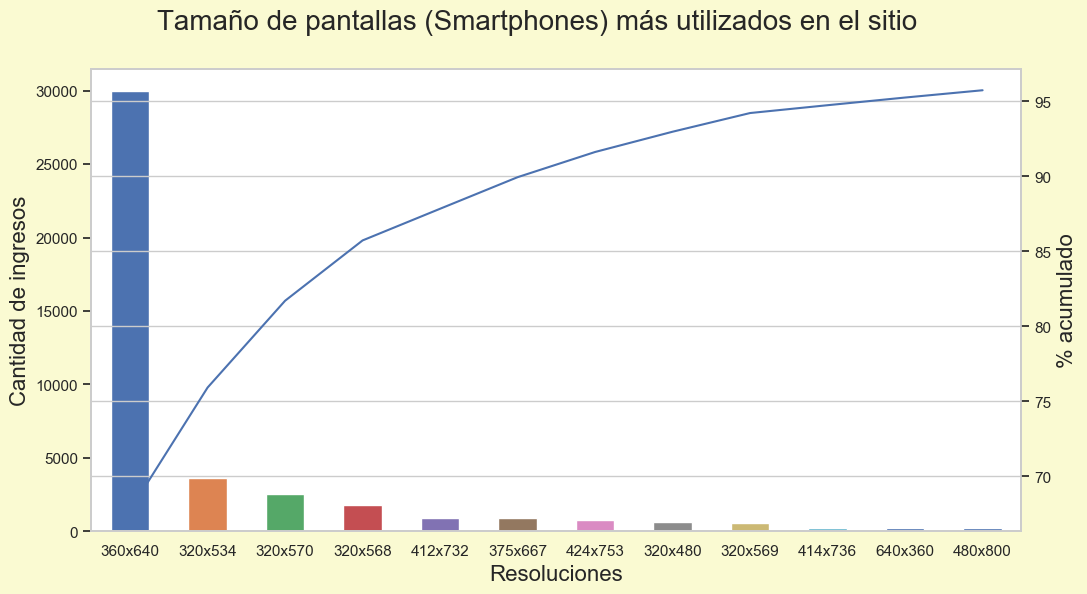

In [381]:
#pvt_screen_Smartphone = reg_visited_site[(reg_visited_site.device_type == 'Smartphone')].pivot_table(index=['screen_resolution'],columns=['new_vs_returning'], values='event', aggfunc='count').fillna(0).astype(int)


pantallas_smartphones = reg_visited_site[(reg_visited_site.device_type == 'Smartphone')]\
    .groupby('screen_resolution').size().sort_values(ascending=False).to_frame(name='cantidad').reset_index()
    

pantallas_smartphones = pantallas_smartphones[pantallas_smartphones.cantidad > 0]
pantallas_smartphones['% del total'] = (pantallas_smartphones['cantidad'] / sum(pantallas_smartphones['cantidad']))*100
pantallas_smartphones['% acumulado'] = (pantallas_smartphones['cantidad'].cumsum() / sum(pantallas_smartphones['cantidad']))*100
pantallas_smartphones = pantallas_smartphones.head(12)


fig = plt.figure(figsize=(12, 6),facecolor='lightgoldenrodyellow')


ax1 = pantallas_smartphones['cantidad'].plot(kind='bar')
ax1.set_ylabel('Cantidad de ingresos' , fontsize=16) 
ax1.set_xlabel('Resoluciones', fontsize=16)

ax2 = pantallas_smartphones['% acumulado'].plot(secondary_y=True)
ax2.set_ylabel('% acumulado' , fontsize=16) 

ax = plt.gca()
ax.set_xticklabels(pantallas_smartphones.screen_resolution, rotation='vertical' )
fig.suptitle("Tamaño de pantallas (Smartphones) más utilizados en el sitio ", fontsize=20)

plt.show()



In [382]:
reg_searched_products = troca[troca.event == 'searched products'].dropna(axis=1, how='all')
#display(reg_searched_products.head(10))
display(reg_searched_products.search_term.value_counts().head(5))

Iphone      1207
Iphone 6    1057
iPhone 6    1005
iphone 6     932
iphone       882
Name: search_term, dtype: int64

In [383]:
#grpb_persona_evento = troca.groupby(['person','event']).size().to_frame('cantidad').reset_index()

#grpb_persona_evento.head(100)

troca.person.drop_duplicates().size


27624

In [384]:
#reg_visited_site.head(10)

df1 = reg_visited_site[reg_visited_site.new_vs_returning == 'New'].groupby(['person','channel', 'device_type']).size().sort_values(ascending=False).to_frame('cantidad').reset_index().set_index('person') 
df1['nuevos'] = 1
df1.drop(['cantidad'], axis=1 , inplace=True)


df2 = reg_visited_site[reg_visited_site.new_vs_returning == 'Returning'].person.drop_duplicates().to_frame('person')
df2['retornos'] = 1
dffunnel = pd.merge(df1, df2, on='person', how='outer')   


df3 = reg_searched_products.person.drop_duplicates().to_frame('person')
df3['busca producto'] = 1
dffunnel = pd.merge(dffunnel, df3, on='person', how='outer')   


df4 = reg_checkout.person.drop_duplicates().to_frame('person')
df4['checkout'] = 1
dffunnel = pd.merge(dffunnel, df4, on='person', how='outer')   


df5 = reg_conversion.person.drop_duplicates().to_frame('person')
df5['conversion'] = 1
dffunnel = pd.merge(dffunnel, df5, on='person', how='outer')   


df6 = reg_brand_listing.person.drop_duplicates().to_frame('person')
df6['lista marca'] = 1
dffunnel = pd.merge(dffunnel, df6, on='person', how='outer')   


df7 = reg_search_engine_hit.person.drop_duplicates().to_frame('person')
df7['buscador hit'] = 1
dffunnel = pd.merge(dffunnel, df7, on='person', how='outer')   


df8 = reg_ad_campaign_hit.person.drop_duplicates().to_frame('person')
df8['marketing hit'] = 1
dffunnel = pd.merge(dffunnel, df8, on='person', how='outer')   


df9 = reg_generic_listing.person.drop_duplicates().to_frame('person')
df9['homepage'] = 1
dffunnel = pd.merge(dffunnel, df9, on='person', how='outer')   

df10 = troca.person.drop_duplicates().to_frame('person') 
df10['total'] = 1
dffunnel = pd.merge(dffunnel, df10, on='person', how='outer')   

dffunnel

column_order = ['total','nuevos' ,'retornos','buscador hit', 'marketing hit' , 'homepage', 'busca producto', 'lista marca', 'checkout', 'conversion']


dffunnel[column_order] = dffunnel[column_order].fillna(value=0)
dffunnel['channel'] = dffunnel['channel'].cat.add_categories(['No disponible']) 
dffunnel[['channel']] = dffunnel[['channel']].fillna(value='No disponible')




In [385]:
dffunnel.head(3)

,person,channel,device_type,nuevos,retornos,busca producto,checkout,conversion,lista marca,buscador hit,marketing hit,homepage,total
0,ffffac8a,Paid,Smartphone,1.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1
1,56c33c84,Paid,Smartphone,1.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1
2,568e8b5b,Organic,Computer,1.0,1.0,1.0,1,0.0,1.0,1.0,1.0,1.0,1


In [386]:

#column_order = ['nuevos' ,'retornos', 'busquedas','checkout', 'conversion']

pvt_funnel_computer = dffunnel[(dffunnel.device_type == 'Computer')].pivot_table(\
                     index=['channel'],\
                     columns=[], \
                     values = column_order, \
                     aggfunc='sum').fillna(0).astype(int)

pvt_funnel_computer = pvt_funnel_computer.reindex(column_order, axis=1)
pvt_funnel_computer



,total,nuevos,retornos,buscador hit,marketing hit,homepage,busca producto,lista marca,checkout,conversion
channel,,,,,,,,,,
Direct,1044,1044,503,193,450,822,271,571,1044,50
Email,2,2,1,1,1,1,0,1,2,0
Organic,3159,3159,1417,3159,1052,2417,821,1873,3159,93
Paid,7490,7490,3369,4962,7490,4016,1802,3705,7490,176
Referral,282,282,126,75,137,156,66,142,282,34
Social,95,95,58,36,70,74,29,57,95,11
Unknown,1,1,0,0,1,1,0,1,1,0
No disponible,0,0,0,0,0,0,0,0,0,0


[Text(0,0.5,'Direct'),
 Text(0,1.5,'Email'),
 Text(0,2.5,'Organic'),
 Text(0,3.5,'Paid'),
 Text(0,4.5,'Referral'),
 Text(0,5.5,'Social'),
 Text(0,6.5,'Unknown'),
 Text(0,7.5,'No disponible')]

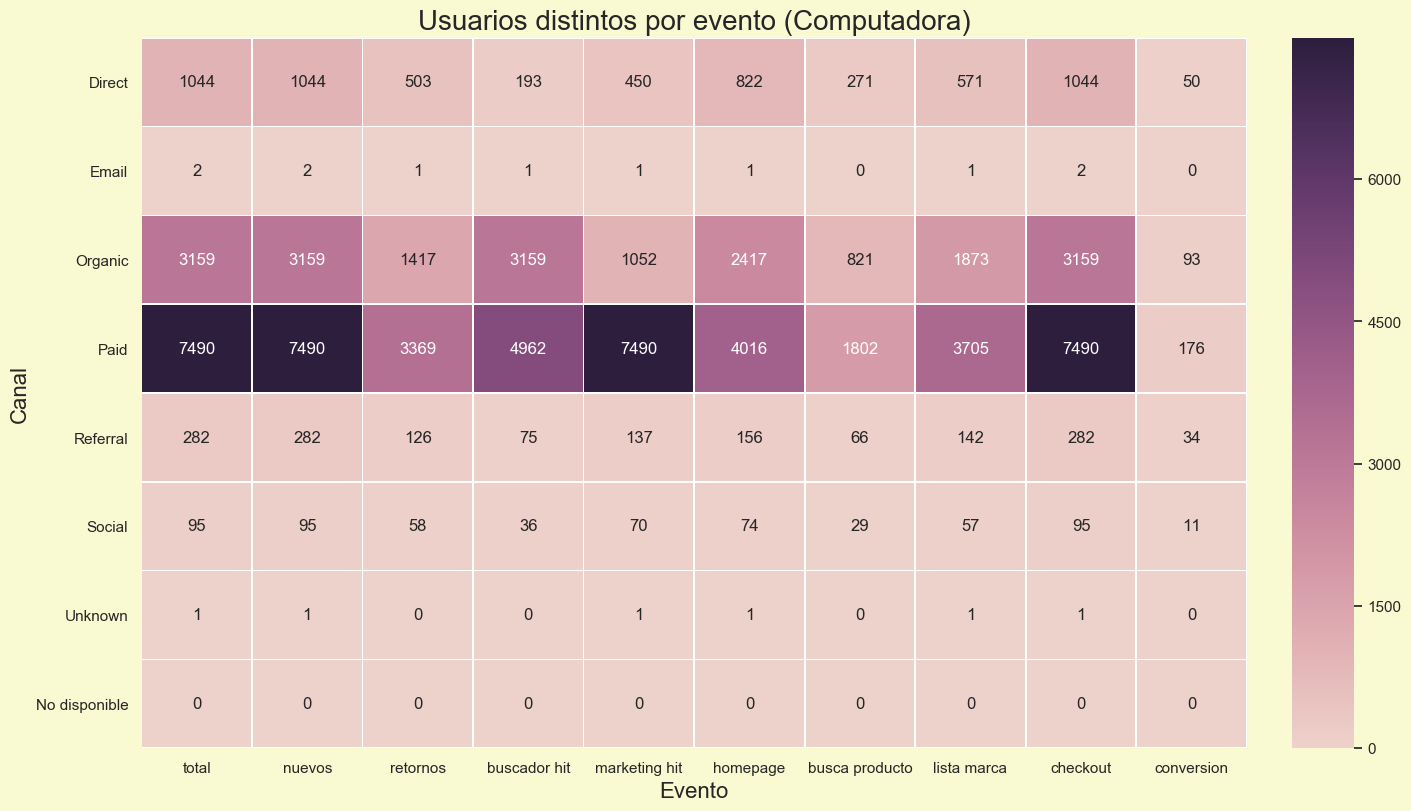

In [387]:


fig = plt.figure(figsize=(14, 8),facecolor='lightgoldenrodyellow' , constrained_layout=True)
cmap1 = sns.cubehelix_palette(8, as_cmap=True)    
plt_funnel_computer = sns.heatmap(pvt_funnel_computer,linewidths=.5,fmt="d",annot=True,cmap=cmap1)
plt_funnel_computer.set_title("Usuarios distintos por evento (Computadora)",fontsize=20)
plt_funnel_computer.set_xlabel("Evento",fontsize=16 )
plt_funnel_computer.set_ylabel("Canal",fontsize=16)
plt_funnel_computer.set_yticklabels(plt_funnel_computer.get_yticklabels(),rotation=0)



In [388]:


pvt_funnel_Smartphone = dffunnel[(dffunnel.device_type == 'Smartphone')].pivot_table(\
                     index=['channel'],\
                     columns=[], \
                     values = column_order, \
                     aggfunc='sum').fillna(0).astype(int)

pvt_funnel_Smartphone = pvt_funnel_Smartphone.reindex(column_order, axis=1)
pvt_funnel_Smartphone



,total,nuevos,retornos,buscador hit,marketing hit,homepage,busca producto,lista marca,checkout,conversion
channel,,,,,,,,,,
Direct,1135,1135,517,207,397,785,393,370,1135,35
Email,8,8,3,3,6,1,0,1,8,0
Organic,2456,2456,1188,2222,890,1906,1068,950,2456,54
Paid,9941,9941,3499,5816,9936,4550,2597,2732,9941,148
Referral,390,390,163,95,140,209,154,114,390,20
Social,375,375,89,21,251,157,63,85,375,6
Unknown,0,0,0,0,0,0,0,0,0,0
No disponible,0,0,0,0,0,0,0,0,0,0


[Text(0,0.5,'Direct'),
 Text(0,1.5,'Email'),
 Text(0,2.5,'Organic'),
 Text(0,3.5,'Paid'),
 Text(0,4.5,'Referral'),
 Text(0,5.5,'Social'),
 Text(0,6.5,'Unknown'),
 Text(0,7.5,'No disponible')]

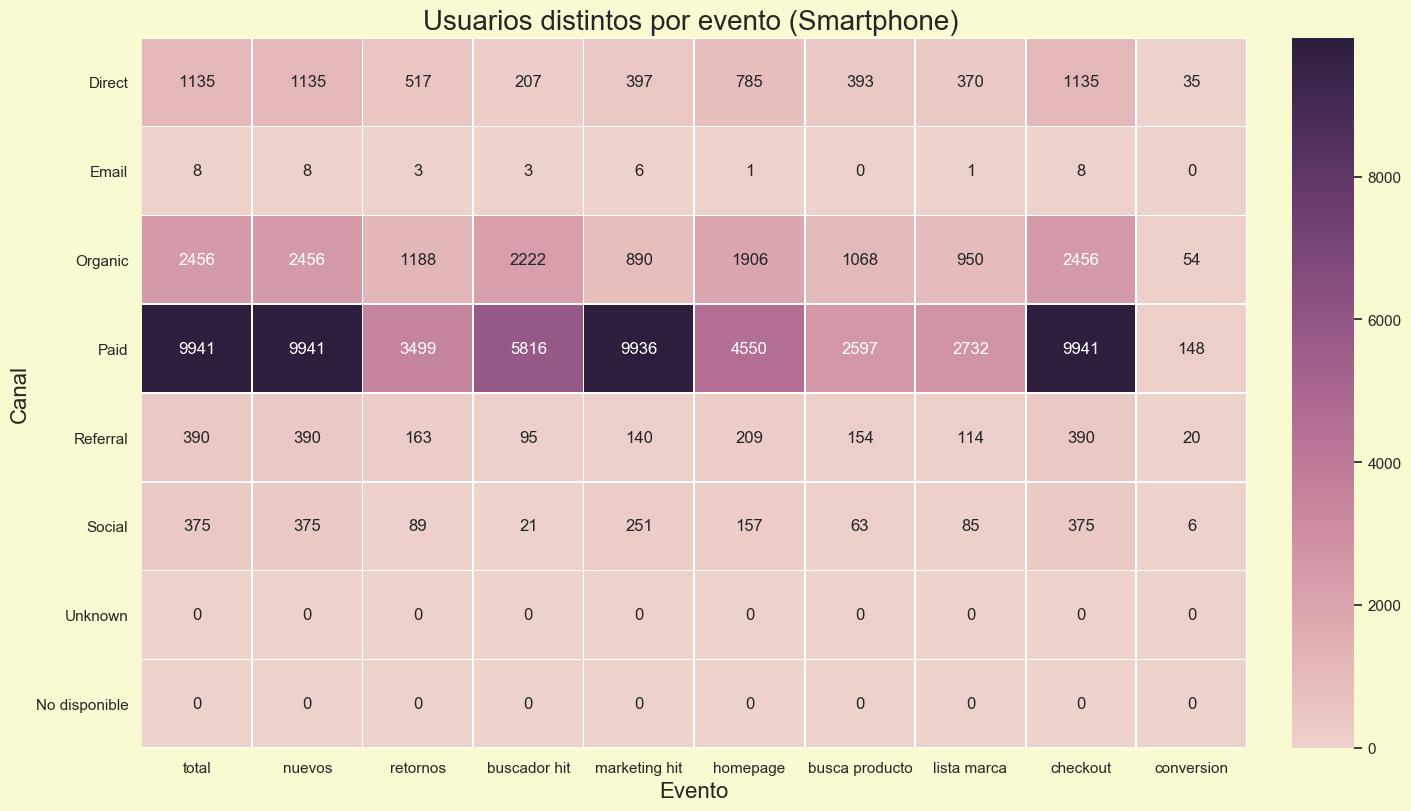

In [389]:

fig = plt.figure(figsize=(14, 8),facecolor='lightgoldenrodyellow' , constrained_layout=True)
cmap1 = sns.cubehelix_palette(8, as_cmap=True)    
plt_funnel_smartphone = sns.heatmap(pvt_funnel_Smartphone,linewidths=.5,fmt="d",annot=True,cmap=cmap1)
plt_funnel_smartphone.set_title("Usuarios distintos por evento (Smartphone) ",fontsize=20)
plt_funnel_smartphone.set_xlabel("Evento",fontsize=16 )
plt_funnel_smartphone.set_ylabel("Canal",fontsize=16)
plt_funnel_smartphone.set_yticklabels(plt_funnel_smartphone.get_yticklabels(),rotation=0)


Text(0,0.5,'Cantidad')

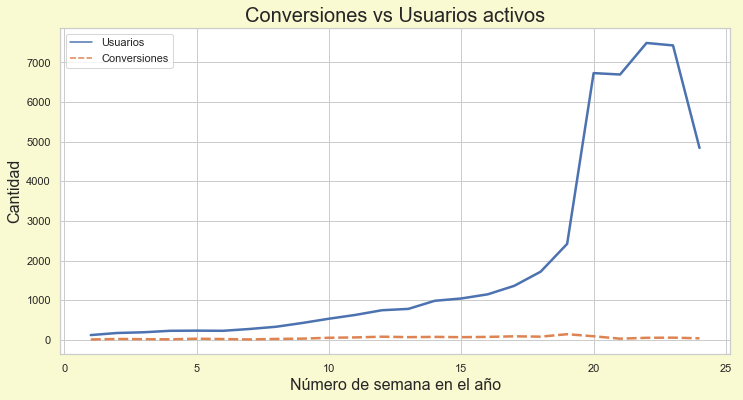

In [349]:

conversiones_semana = reg_conversion.groupby('semana').size().sort_values(ascending=False).to_frame(name='Conversiones').reset_index().set_index('semana')
usu_activos = troca[['semana','person']].drop_duplicates().groupby('semana').size().sort_values(ascending=False).to_frame(name='Usuarios').reset_index().set_index('semana')
usu_conv = usu_activos.merge(conversiones_semana,  on='semana', how='left') #.reset_index().sort_values(by=['semana'])   

#display(usu_conv)


fig = plt.figure(figsize=(12, 6),facecolor='lightgoldenrodyellow')
plt_conversion_semana = sns.lineplot(data=usu_conv, linewidth=2.5)
plt_conversion_semana.set_title("Conversiones vs Usuarios activos",fontsize=20)
plt_conversion_semana.set_xlabel("Número de semana en el año",fontsize=16)
plt_conversion_semana.set_ylabel("Cantidad",fontsize=16)




Text(0,0.5,'% Conversión')

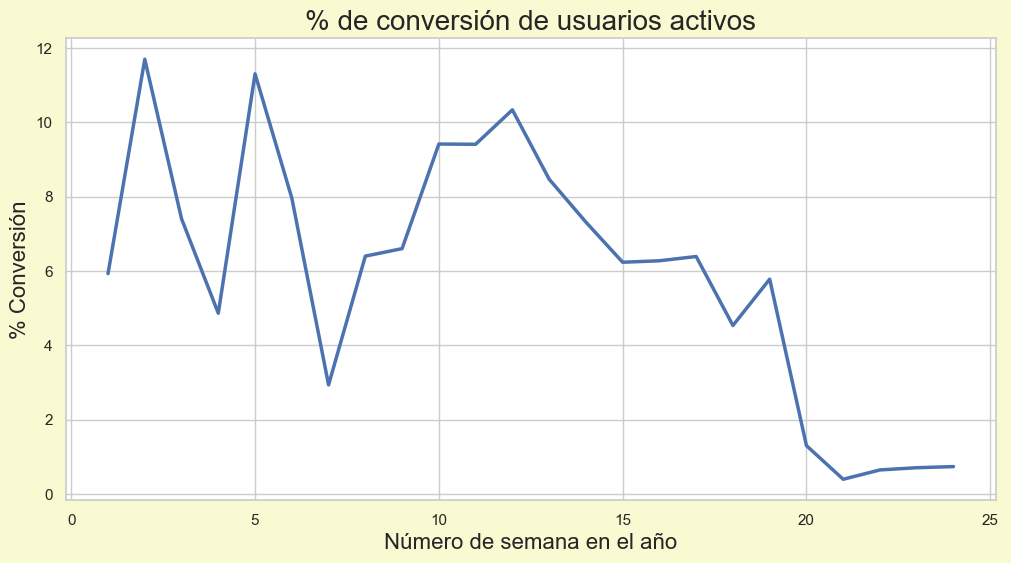

In [391]:
usu_conv['% Conversion activos'] = 100.0 * usu_conv.Conversiones / usu_conv.Usuarios

fig = plt.figure(figsize=(12, 6),facecolor='lightgoldenrodyellow')
plt_conversion_semana = sns.lineplot(data=usu_conv['% Conversion activos'], linewidth=2.5)
plt_conversion_semana.set_title("% de conversión de usuarios activos",fontsize=20)
plt_conversion_semana.set_xlabel("Número de semana en el año",fontsize=16)
plt_conversion_semana.set_ylabel("% Conversión",fontsize=16)

